In [1]:
from lib.backbone import StackedHGNetV1
from lib.utility import get_dataloader

In [2]:
class Model_Config:
    def __init__(self):
        self.classes_num = [98, 9, 98]
        self.edge_info = (
                (False, (
                    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                    27,
                    28, 29, 30, 31, 32)),  # FaceContour
                (True, (33, 34, 35, 36, 37, 38, 39, 40, 41)),  # RightEyebrow
                (True, (42, 43, 44, 45, 46, 47, 48, 49, 50)),  # LeftEyebrow
                (False, (51, 52, 53, 54)),  # NoseLine
                (False, (55, 56, 57, 58, 59)),  # Nose
                (True, (60, 61, 62, 63, 64, 65, 66, 67)),  # RightEye
                (True, (68, 69, 70, 71, 72, 73, 74, 75)),  # LeftEye
                (True, (76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87)),  # OuterLip
                (True, (88, 89, 90, 91, 92, 93, 94, 95)),  # InnerLip
            )
        self.nstack = 4
        self.add_coord = True
        self.decoder_type = "default"
        self.width = 256
        self.height = 256
        self.use_AAM = True

In [3]:
model_config = Model_Config()
net = StackedHGNetV1(config=model_config,
                        classes_num=model_config.classes_num,
                        edge_info=model_config.edge_info,
                        nstack=model_config.nstack,
                        add_coord=model_config.add_coord,
                        decoder_type=model_config.decoder_type)

In [4]:
net

StackedHGNetV1(
  (pre): Sequential(
    (0): CoordConvTh(
      (addcoords): AddCoordsTh()
      (conv): Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
      (relu): ReLU()
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResBlock(
      (relu): ReLU()
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): ConvBlock(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): ConvBlock(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): ConvBlock(
        (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      )
      (skip_layer): ConvBlock(
        (conv): Conv2d(64, 128, kernel_size

In [5]:
class Data_Config:
    def __init__(self):
            self.data_definition = "WFLW"
            self.train_tsv_file = 'pub_annot/WFLW/train.tsv'
            self.val_tsv_file = 'pub_annot/WFLW/test.tsv'
            self.train_pic_dir = 'pub_dataset/WFLW/WFLW_images'
            self.val_pic_dir = 'pub_dataset/WFLW/WFLW_images'
            self.loader_type = 'alignment'
            self.batch_size = 16
            self.val_batch_size = 32
            self.train_num_workers = 1
            self.val_num_workers = 1
            self.width = 256
            self.height = 256
            self.channels = 3
            self.means = (127.5, 127.5, 127.5)
            self.scale = 0.00784313725490196
            self.classes_num = [98, 9, 98]
            self.crop_op = True
            self.aug_prob = 1.0
            self.label_num = 12
            self.edge_info = (
                (False, (
                    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                    27,
                    28, 29, 30, 31, 32)),  # FaceContour
                (True, (33, 34, 35, 36, 37, 38, 39, 40, 41)),  # RightEyebrow
                (True, (42, 43, 44, 45, 46, 47, 48, 49, 50)),  # LeftEyebrow
                (False, (51, 52, 53, 54)),  # NoseLine
                (False, (55, 56, 57, 58, 59)),  # Nose
                (True, (60, 61, 62, 63, 64, 65, 66, 67)),  # RightEye
                (True, (68, 69, 70, 71, 72, 73, 74, 75)),  # LeftEye
                (True, (76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87)),  # OuterLip
                (True, (88, 89, 90, 91, 92, 93, 94, 95)),  # InnerLip
            )
            self.flip_mapping = (
                [0, 32], [1, 31], [2, 30], [3, 29], [4, 28], [5, 27], [6, 26], [7, 25], [8, 24], [9, 23], [10, 22],
                [11, 21], [12, 20], [13, 19], [14, 18], [15, 17],  # cheek
                [33, 46], [34, 45], [35, 44], [36, 43], [37, 42], [38, 50], [39, 49], [40, 48], [41, 47],  # elbrow
                [60, 72], [61, 71], [62, 70], [63, 69], [64, 68], [65, 75], [66, 74], [67, 73],
                [55, 59], [56, 58],
                [76, 82], [77, 81], [78, 80], [87, 83], [86, 84],
                [88, 92], [89, 91], [95, 93], [96, 97]
            )
            self.encoder_type = 'default'

            # Val
            self.norm_type = 'default'
            self.nme_left_index = 60
            self.nme_right_index = 72


In [6]:
data_config = Data_Config()
train_loader = get_dataloader(data_config, data_type='train', world_rank=0, world_size=1)
val_loader = get_dataloader(data_config, "val")

In [7]:
import numpy as np
import pandas as pd
import cv2
import re
import matplotlib.pyplot as plt
import torch

WFLW Original Label

In [9]:
train_label = pd.read_csv(data_config.train_tsv_file, sep="\t", header=None)

In [10]:
train_label

,0,1,2,3,4,5,6
0,./rawImages\51--Dresses/51_Dresses_wearingdres...,"431.559411,870.597153,463.665456,870.444454,55...","309.307007,538.369019,317.857345,560.120847,32...",1.995,506.5,677.0,"0,0,1,0,0,0"
1,./rawImages\19--Couple/19_Couple_Couple_19_340...,"671.50802,309.583742,683.397696,308.057629,714...","579.002991,167.764008,579.68207,179.841323,580...",0.840,662.5,226.0,"0,0,1,0,0,0"
2,./rawImages\15--Stock_Market/15_Stock_Market_S...,"353.951729,326.266933,364.446792,322.751258,38...","249.128006,175.462997,249.330412,188.417601,24...",0.850,334.0,244.0,"0,0,1,0,0,0"
3,./rawImages\44--Aerobics/44_Aerobics_Aerobics_...,"860.593298,694.927884,866.395843,694.29868,882...","812.989014,627.505005,813.713626,633.25443,814...",0.455,857.5,652.5,"0,0,0,0,0,1"
4,./rawImages\5--Car_Accident/5_Car_Accident_Acc...,"584.537402,374.879784,590.967293,373.393477,60...","507.287994,280.026001,507.360081,288.558285,50...",0.620,569.0,323.0,"0,0,0,0,0,1"
...,...,...,...,...,...,...,...
7495,./rawImages\13--Interview/13_Interview_Intervi...,"751.768513,566.503848,760.901289,566.517005,78...","707.510986,466.559998,707.241833,474.279968,70...",0.680,773.0,499.5,"0,0,0,0,0,0"
7496,./rawImages\31--Waiter_Waitress/31_Waiter_Wait...,"246.289068,425.912171,256.405762,423.179657,28...","95.217903,336.835999,100.954315,347.911683,106...",1.110,206.0,337.0,"0,0,0,0,0,0"
7497,./rawImages\23--Shoppers/23_Shoppers_Shoppers_...,"460.314652,791.105181,484.923075,798.408787,55...","394.656036,549.344543,398.777789,565.350391,39...",1.525,527.0,647.5,"0,0,0,0,0,0"
7498,./rawImages\7--Cheering/7_Cheering_Cheering_7_...,"655.363272,266.318041,661.074763,265.929322,67...","625.458008,193.985992,625.306287,199.320526,62...",0.400,664.0,227.0,"0,0,0,0,0,0"


In [11]:
line = train_label[train_label.iloc[:,0].apply(lambda x: re.search(r'51_Dresses_wearingdress_51_377\.jpg',x)!=None)].iloc[0]

In [12]:
def get_label(line):
    image_path = line[0]
    landmarks_5pts = line[1]
    landmarks_5pts = np.array(list(map(float, landmarks_5pts.split(","))), dtype=np.float32).reshape(5, 2)
    landmarks_target = line[2]
    landmarks_target = np.array(list(map(float, landmarks_target.split(","))), dtype=np.float32).reshape(
        data_config.classes_num[0], 2)
    scale = float(line[3])
    center_w, center_h = float(line[4]), float(line[5])
    return image_path,landmarks_5pts,landmarks_target,scale,center_w,center_h

In [13]:
image_path,landmarks_5pts,landmarks_target,scale,center_w,center_h = get_label(line)

In [14]:
image_path

'./rawImages\\51--Dresses/51_Dresses_wearingdress_51_377.jpg'

In [15]:
img = cv2.imread(image_path.replace('rawImages\\','pub_dataset/WFLW/WFLW_images/'), cv2.IMREAD_COLOR)

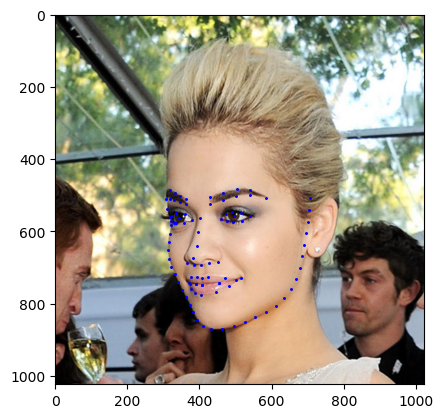

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.scatter(landmarks_target[:,0], landmarks_target[:,1], s=5, marker='.', c='b')

Processed Data

In [17]:
def denorm_points(points, h, w, align_corners=False):
    if align_corners:
        # [-1, +1] -> [0, SIZE-1]
        des_points = (points + 1) / 2 * torch.tensor([w - 1, h - 1]).to(points).view(1, 1, 2)
    else:
        # [-1, +1] -> [-0.5, SIZE-0.5]
        des_points = ((points + 1) * torch.tensor([w, h]).to(points).view(1, 1, 2) - 1) / 2
    return des_points

In [18]:
for batch,sample in enumerate(train_loader):
    break

In [19]:
i = 2
print(sample['data'][i].numpy().shape)
img = sample['data'][i]
len(sample['label']) # landmarks, heatmap, edgemap
landmarks, heatmaps, edgemaps = sample['label']
landmark = landmarks[i]
heatmap = heatmaps[i]
edgemap = edgemaps[i]
matrixs = sample['matrix']
matrix = matrixs[i]

(3, 256, 256)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


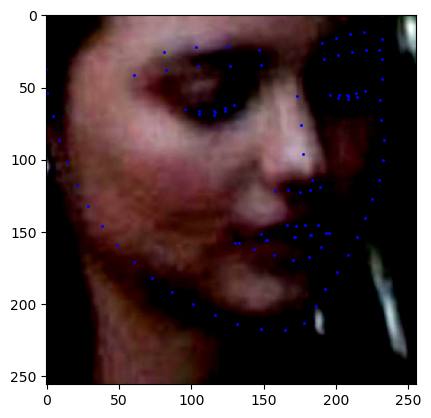

In [20]:
denorm_landmark = denorm_points(landmark,h=256,w=256).squeeze()
ori_img = cv2.cvtColor(img.numpy().transpose(1, 2, 0), cv2.COLOR_BGR2RGB) #'pub_dataset/300W/helen/trainset/2838782176_1.jpg'
plt.imshow(ori_img)
plt.scatter(denorm_landmark[:,0], denorm_landmark[:,1], s=5, marker='.', c='b')

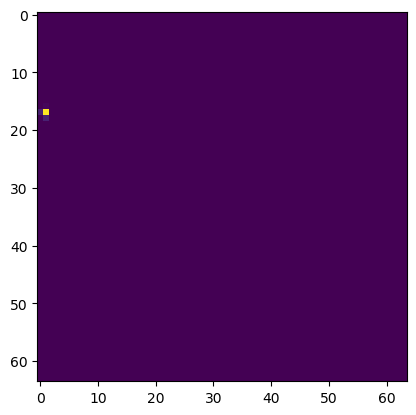

In [21]:
plt.imshow(heatmap[2], cmap='viridis', interpolation='nearest')

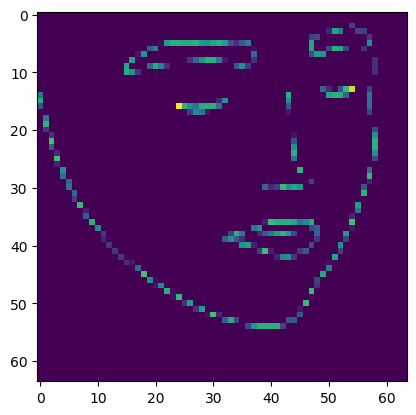

In [22]:
combined_edgemap = np.max(edgemap.numpy(), axis=0)
plt.imshow(combined_edgemap, cmap='viridis', interpolation='nearest')

In [23]:
# output, heatmaps, landmarks = net(sample['data'])
# output: [landmarks, pointmaps, edgemaps ] * nstack


In [24]:

import torch.nn.functional as F
from lib.loss import *
from lib.metric import NME, FR_AUC

In [25]:
class Train_Config:
    def __init__(self):
        # self.classes_num = [68, 9, 68]
        self.nstack = 4
        # self.add_coord = True
        # self.decoder_type = "default"
        # self.width = 256
        # self.height = 256
        self.use_AAM = True
        self.label_num = self.nstack * 3 if self.use_AAM else self.nstack

        self.loss_func = "STARLoss_v2"

        # STAR Loss paras
        self.star_w = 1
        self.star_dist = 'smoothl1'

        self.loss_weights, self.criterion_labels, self.metrics = self.set_criterions()
        self.criterions = self.get_criterions()

        self.batch_weight = 1.0

        self.optimizer = "adam"
        self.learn_rate = 0.001
        self.weight_decay = 0.00001
        self.betas = [0.9, 0.999]
        self.gamma = 0.9
        self.milestones = [10*i for i in range(2,10)]

    def set_criterions(self):
        loss_weights, criterions, metrics = [], [], []
        for i in range(self.nstack):
            factor = (2 ** i) / (2 ** (self.nstack - 1))
            if self.use_AAM:
                loss_weights += [factor * weight for weight in [1.0, 10.0, 10.0]]
                criterions += [self.loss_func, "AWingLoss", "AWingLoss"]
                metrics += ["NME", None, None]
            else:
                loss_weights += [factor * weight for weight in [1.0]]
                criterions += [self.loss_func, ]
                metrics += ["NME", ]
        return loss_weights, criterions, metrics
    
    def get_criterions(self):
        criterions = []
        for k in range(self.label_num):
            label = self.criterion_labels[k]
            if label == "AWingLoss":
                criterion = AWingLoss()
            elif label == "smoothl1":
                criterion = SmoothL1Loss()
            elif label == "l1":
                criterion = F.l1_loss
            elif label == 'l2':
                criterion = F.mse_loss
            elif label == "STARLoss":
                criterion = STARLoss(dist=self.star_dist, w=self.star_w)
            elif label == "STARLoss_v2":
                criterion = STARLoss_v2(dist=self.star_dist, w=self.star_w)
            else:
                assert False
            criterions.append(criterion)
        return criterions

In [26]:
train_config = Train_Config()

In [27]:
import lightning as L
from lib.metric import NME, FR_AUC

In [28]:

# define the LightningModule
class LitSTAR(L.LightningModule):
    def __init__(self, net, data_config, model_config, train_config):
        super().__init__()
        self.net = net
        self.data_config = data_config
        self.model_config = model_config
        self.train_config = train_config
        self.ave_losses = [0] * self.train_config.label_num
        self.list_nmes = [[] for i in range(self.data_config.label_num)]
        
    def training_step(self, sample, batch_idx):

        imgs = sample["data"].float()

        labels = []
        if isinstance(sample["label"], list):
            for label in sample["label"]:
                label = label.float()
                labels.append(label)
        else:
            label = sample["label"].float()
            for k in range(label.shape[1]):
                labels.append(label[:, k])
        labels = model_config.nstack * labels

        # forward
        output, heatmaps, landmarks = self.net(imgs)


        losses, sum_loss = self.compute_loss(output, labels, heatmaps, landmarks)
        self.ave_losses = list(map(sum, zip(self.ave_losses, losses)))
        avg_loss = sum(losses) / len(losses)
        # Logging to TensorBoard (if installed) by default
        self.log("sum_loss", sum_loss, prog_bar=True)
        self.log("AVG_loss",avg_loss,prog_bar=True)
        return sum_loss
    
    def validation_step(self,sample,batch_idx):
        
        metric_nme = NME(nme_left_index=self.data_config.nme_left_index, nme_right_index=self.data_config.nme_right_index)
        metric_fr_auc = FR_AUC(data_definition=self.data_config.data_definition)

        output_pd = None

        imgs = sample["data"].float()

        labels = []
        if isinstance(sample["label"], list):
            for label in sample["label"]:
                label = label.float()
                labels.append(label)
        else:
            label = sample["label"].float()
            for k in range(label.shape[1]):
                labels.append(label[:, k])
        labels = model_config.nstack * labels

        # forward
        output, heatmaps, landmarks = self.net(imgs)

        for k in range(self.data_config.label_num):
            if self.train_config.metrics[k] is not None:
                self.list_nmes[k] += metric_nme.test(output[k], labels[k])

    def on_validation_epoch_end(self):
        metric_nme = NME(nme_left_index=self.data_config.nme_left_index, nme_right_index=self.data_config.nme_right_index)
        metric_fr_auc = FR_AUC(data_definition=self.data_config.data_definition)
        metrics = [[torch.mean(torch.tensor(nmes)), ] + metric_fr_auc.test(torch.tensor(nmes)) for nmes in self.list_nmes]

        # self.log("Val_metrics",metrics)
        for k, metric in enumerate(metrics):
            nme, fr, auc = metric
            # print(metric)
            if not torch.isnan(nme):
                stack_no = k//3
                self.log(f"Stack{stack_no}_NME",nme,on_epoch=True)
                self.log(f"Stack{stack_no}_FR",fr,on_epoch=True)
                self.log(f"Stack{stack_no}_AUC",auc,on_epoch=True)
                # print("Val/Metric{:3d} in this epoch: [NME {:.6f}, FR {:.6f}, AUC {:.6f}]".format(
                #     k, metric[0], metric[1], metric[2]))

        self.list_nmes = [[] for i in range(self.data_config.label_num)]


    def compute_loss(self, output, labels, heatmap=None, landmarks=None):
        batch_weight = self.train_config.batch_weight
        sum_loss = 0
        losses = list()
        # print(self.train_config.criterion_labels)
        for k in range(self.train_config.label_num):
            
            if self.train_config.criterion_labels[k] in ['smoothl1', 'l1', 'l2', 'WingLoss', 'AWingLoss']:
                loss = self.train_config.criterions[k](output[k], labels[k])
            elif self.train_config.criterion_labels[k] in ["STARLoss", "STARLoss_v2"]:
                _k = int(k / 3) if self.train_config.use_AAM else k
                loss = self.train_config.criterions[k](heatmap[_k], labels[k])
            else:
                assert NotImplementedError
            loss = batch_weight * loss
            sum_loss += self.train_config.loss_weights[k] * loss
            losses.append(loss)
        return losses, sum_loss

    def configure_optimizers(self):
        params = self.net.parameters()

        optimizer = None
        if self.train_config.optimizer == "sgd":
            optimizer = torch.optim.SGD(
                params,
                lr=self.train_config.learn_rate,
                momentum=self.train_config.momentum,
                weight_decay=self.train_config.weight_decay,
                nesterov=self.train_config.nesterov)
        elif self.train_config.optimizer == "adam":
            optimizer = torch.optim.Adam(
                params,
                lr=self.train_config.learn_rate)
        elif self.train_config.optimizer == "rmsprop":
            optimizer = torch.optim.RMSprop(
                params,
                lr=self.train_config.learn_rate,
                momentum=self.train_config.momentum,
                alpha=self.train_config.alpha,
                eps=self.train_config.epsilon,
                weight_decay=self.train_config.weight_decay
            )
        else:
            assert False

        config_dict = {
            "optimizer" : optimizer,
            "lr_scheduler" : {
                "scheduler" : torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=self.train_config.milestones, gamma=self.train_config.gamma)
            }
        }
        return config_dict


# init the module
STAR = LitSTAR(net, data_config, model_config, train_config)

In [29]:
from lightning.pytorch.callbacks import LearningRateMonitor
lr_monitor = LearningRateMonitor(logging_interval='epoch')

In [30]:
ckpt_path = None
if ckpt_path is not None:
    STAR = LitSTAR.load_from_checkpoint(ckpt_path,
    net = net, 
    data_config = data_config, 
    model_config = model_config,
    train_config = train_config)

In [31]:
# Pretrained Model
# model_path = "300W_STARLoss_NME_2_87.pkl"
# checkpoint = torch.load(model_path)
# STAR.net.load_state_dict(checkpoint["net"])

In [32]:
trainer = L.Trainer(
    max_epochs=10,
    limit_train_batches = None,
    log_every_n_steps=1,
    callbacks=[lr_monitor],
    )
trainer.fit(
    model=STAR, 
    train_dataloaders=train_loader,
    val_dataloaders=val_loader,
    # ckpt_path=ckpt_path
    )

/home/groups/sammer/haogeh/Python/asymm/STAR/.venv/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/groups/sammer/haogeh/Python/asymm/STAR/.venv/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type           | Params | Mode 
------------------------------------------------
0 | net  | StackedHGNetV1 | 17.2 M | train
------------------------------------------------
17.2 M    Trainable params
0         Non-trainable params
17.2 M    Total params
68.709    Total estimated model params size (MB)
916       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/groups/sammer/haogeh/Python/asymm/STAR/.venv/lib/python3.9/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Training: |          | 0/? [00:00<?, ?it/s]

DEMO

In [75]:
import dlib
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [42]:
predictor_path = 'shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)

In [108]:
face_file_path = 'pub_dataset/WFLW/WFLW_images/8--Election_Campain/8_Election_Campain_Election_Campaign_8_25.jpg'
image = cv2.imread(face_file_path)

In [ ]:
class GetCropMatrix():
    """
    from_shape -> transform_matrix
    """

    def __init__(self, image_size, target_face_scale, align_corners=False):
        self.image_size = image_size
        self.target_face_scale = target_face_scale
        self.align_corners = align_corners

    def _compose_rotate_and_scale(self, angle, scale, shift_xy, from_center, to_center):
        cosv = math.cos(angle)
        sinv = math.sin(angle)

        fx, fy = from_center
        tx, ty = to_center

        acos = scale * cosv
        asin = scale * sinv

        a0 = acos
        a1 = -asin
        a2 = tx - acos * fx + asin * fy + shift_xy[0]

        b0 = asin
        b1 = acos
        b2 = ty - asin * fx - acos * fy + shift_xy[1]

        rot_scale_m = np.array([
            [a0, a1, a2],
            [b0, b1, b2],
            [0.0, 0.0, 1.0]
        ], np.float32)
        return rot_scale_m

    def process(self, scale, center_w, center_h):
        if self.align_corners:
            to_w, to_h = self.image_size - 1, self.image_size - 1
        else:
            to_w, to_h = self.image_size, self.image_size

        rot_mu = 0
        scale_mu = self.image_size / (scale * self.target_face_scale * 200.0)
        shift_xy_mu = (0, 0)
        matrix = self._compose_rotate_and_scale(
            rot_mu, scale_mu, shift_xy_mu,
            from_center=[center_w, center_h],
            to_center=[to_w / 2.0, to_h / 2.0])
        return matrix


class TransformPerspective():
    """
    image, matrix3x3 -> transformed_image
    """

    def __init__(self, image_size):
        self.image_size = image_size

    def process(self, image, matrix):
        return cv2.warpPerspective(
            image, matrix, dsize=(self.image_size, self.image_size),
            flags=cv2.INTER_LINEAR, borderValue=0)


class TransformPoints2D():
    """
    points (nx2), matrix (3x3) -> points (nx2)
    """

    def process(self, srcPoints, matrix):
        # nx3
        desPoints = np.concatenate([srcPoints, np.ones_like(srcPoints[:, [0]])], axis=1)
        desPoints = desPoints @ np.transpose(matrix)  # nx3
        desPoints = desPoints[:, :2] / desPoints[:, [2, 2]]
        return desPoints.astype(srcPoints.dtype)


class Alignment:
    def __init__(self, model):
        self.input_size = 256
        self.target_face_scale = 1.0

        self.model =model
        self.model.eval()
        self.getCropMatrix = GetCropMatrix(image_size=self.input_size, target_face_scale=self.target_face_scale,
                                           align_corners=True)
        self.transformPerspective = TransformPerspective(image_size=self.input_size)
        self.transformPoints2D = TransformPoints2D()

    def norm_points(self, points, align_corners=False):
        if align_corners:
            # [0, SIZE-1] -> [-1, +1]
            return points / torch.tensor([self.input_size - 1, self.input_size - 1]).to(points).view(1, 1, 2) * 2 - 1
        else:
            # [-0.5, SIZE-0.5] -> [-1, +1]
            return (points * 2 + 1) / torch.tensor([self.input_size, self.input_size]).to(points).view(1, 1, 2) - 1

    def denorm_points(self, points, align_corners=False):
        if align_corners:
            # [-1, +1] -> [0, SIZE-1]
            return (points + 1) / 2 * torch.tensor([self.input_size - 1, self.input_size - 1]).to(points).view(1, 1, 2)
        else:
            # [-1, +1] -> [-0.5, SIZE-0.5]
            return ((points + 1) * torch.tensor([self.input_size, self.input_size]).to(points).view(1, 1, 2) - 1) / 2

    def preprocess(self, image, scale, center_w, center_h):
        matrix = self.getCropMatrix.process(scale, center_w, center_h)
        input_tensor = self.transformPerspective.process(image, matrix)
        input_tensor = input_tensor[np.newaxis, :]

        input_tensor = torch.from_numpy(input_tensor)
        input_tensor = input_tensor.float().permute(0, 3, 1, 2)
        input_tensor = input_tensor / 255.0 * 2.0 - 1.0
        # input_tensor = input_tensor.to(self.model.device)
        return input_tensor, matrix

    def postprocess(self, srcPoints, coeff):
        # dstPoints = self.transformPoints2D.process(srcPoints, coeff)
        # matrix^(-1) * src = dst
        # src = matrix * dst
        dstPoints = np.zeros(srcPoints.shape, dtype=np.float32)
        for i in range(srcPoints.shape[0]):
            dstPoints[i][0] = coeff[0][0] * srcPoints[i][0] + coeff[0][1] * srcPoints[i][1] + coeff[0][2]
            dstPoints[i][1] = coeff[1][0] * srcPoints[i][0] + coeff[1][1] * srcPoints[i][1] + coeff[1][2]
        return dstPoints

    def analyze(self, image, scale, center_w, center_h):
        input_tensor, matrix = self.preprocess(image, scale, center_w, center_h)


        with torch.no_grad():
            output = self.model(input_tensor)
        landmarks = output[-1][0]

        landmarks = self.denorm_points(landmarks)
        landmarks = landmarks.data.cpu().numpy()[0]
        landmarks = self.postprocess(landmarks, np.linalg.inv(matrix))

        return landmarks



In [110]:
alignment = Alignment(model=STAR.net)

In [111]:
dets = detector(image, 1)
for detection in dets:
    face = sp(image,detection)
    shape = []
    for i in range(68):
        x = face.part(i).x
        y = face.part(i).y
        shape.append((x, y))
    shape = np.array(shape)
    # image_draw = draw_pts(image_draw, shape)
    x1, x2 = shape[:, 0].min(), shape[:, 0].max()
    y1, y2 = shape[:, 1].min(), shape[:, 1].max()
    scale = min(x2 - x1, y2 - y1) / 200 * 1.05
    center_w = (x2 + x1) / 2
    center_h = (y2 + y1) / 2

    scale, center_w, center_h = float(scale), float(center_w), float(center_h)

    landmarks_pv = alignment.analyze(image, scale, center_w, center_h)

Number of faces detected: 1
Detection 0: Left: 572 Top: 201 Right: 758 Bottom: 387


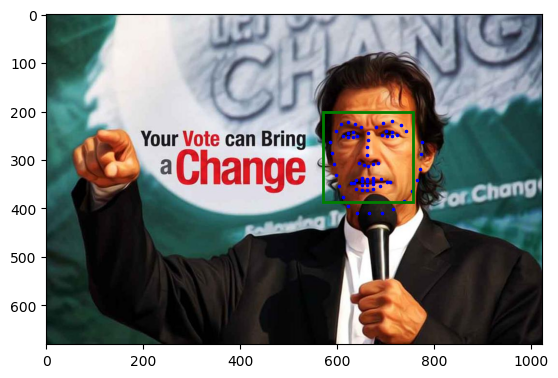

In [112]:
img = image.copy()
landmarks = landmarks_pv
print("Number of faces detected: {}".format(len(dets)))
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    # Get the landmarks/parts for the face in box d.
    d_left = d.left()
    d_top = d.top()
    d_right = d.right()
    d_bottom = d.bottom()

    x = d_left
    y = d_top
    w = d_right - d_left
    h = d_bottom - d_top
    
    bbox = (x, y, w, h)
    # output = predictor.inference(img, [bbox])
    # # Draw the face landmarks on the screen.
    # landmarks = np.array(output['landmarks']).squeeze()
    
    x, y, w, h = map(int, bbox)

    fig, ax = plt.subplots(1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image
    ax.imshow(img)
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    ax.scatter(landmarks[:,0], landmarks[:,1], s=10, marker='.', c='b')
    plt.show()